***Download and extract Food 101 Dataset***

In [1]:
# Check if GPU is enabled
import tensorflow as tf
print(tf.__version__)
print(tf.test.gpu_device_name())

2.15.0
/device:GPU:0


In [2]:
# Helper function to download data and extract
import os
def get_data_extract():
  if "food-101" in os.listdir():
    print("Dataset already exists")
  else:
    print("Downloading the data...")
    !wget http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz
    print("Dataset downloaded!")
    print("Extracting data..")
    !tar xzvf food-101.tar.gz
    print("Extraction done!")

In [3]:
# Download data and extract it to folder
get_data_extract()

Streaming output truncated to the last 5000 lines.
food-101/images/cannoli/1767088.jpg
food-101/images/cannoli/3201965.jpg
food-101/images/cannoli/3778102.jpg
food-101/images/cannoli/2674065.jpg
food-101/images/cannoli/1169899.jpg
food-101/images/cannoli/1378086.jpg
food-101/images/cannoli/803909.jpg
food-101/images/cannoli/1067240.jpg
food-101/images/cannoli/3002709.jpg
food-101/images/cannoli/2612632.jpg
food-101/images/cannoli/3627612.jpg
food-101/images/cannoli/1798703.jpg
food-101/images/cannoli/560632.jpg
food-101/images/cannoli/512468.jpg
food-101/images/cannoli/2331523.jpg
food-101/images/cannoli/3118302.jpg
food-101/images/cannoli/1499412.jpg
food-101/images/cannoli/1557459.jpg
food-101/images/cannoli/146566.jpg
food-101/images/cannoli/96922.jpg
food-101/images/cannoli/1699562.jpg
food-101/images/cannoli/730051.jpg
food-101/images/cannoli/2177977.jpg
food-101/images/cannoli/2767028.jpg
food-101/images/cannoli/6564.jpg
food-101/images/cannoli/553447.jpg
food-101/images/cannoli/

### Understand dataset structure and files

**The dataset being used is [Food 101](https://www.vision.ee.ethz.ch/datasets_extra/food-101/)**
* **This dataset has 101000 images in total. It's a food dataset with 101 categories(multiclass)**
* **Each type of food has 750 training samples and 250 test samples**
* **Note found on the webpage of the dataset :  **  
***On purpose, the training images were not cleaned, and thus still contain some amount of noise. This comes mostly in the form of intense colors and sometimes wrong labels. All images were rescaled to have a maximum side length of 512 pixels.***  
* **The entire dataset is 5GB in size**

In [4]:
# Check the extracted dataset folder
!ls food-101/

images	license_agreement.txt  meta  README.txt


**images** folder contains 101 folders with 1000 images  each  
Each folder contains images of a specific food class

In [5]:
import os
os.listdir('food-101/images')

['mussels',
 'fish_and_chips',
 'creme_brulee',
 'french_fries',
 'cup_cakes',
 'tacos',
 'eggs_benedict',
 'pizza',
 'chicken_curry',
 'waffles',
 'pulled_pork_sandwich',
 'spring_rolls',
 'paella',
 'onion_rings',
 'bread_pudding',
 'ravioli',
 'guacamole',
 'pad_thai',
 'risotto',
 'ice_cream',
 'poutine',
 'grilled_salmon',
 'hamburger',
 'cheese_plate',
 'sushi',
 'beef_tartare',
 'baklava',
 'gnocchi',
 'seaweed_salad',
 'gyoza',
 'beet_salad',
 'tuna_tartare',
 'caprese_salad',
 'ramen',
 'miso_soup',
 'peking_duck',
 'edamame',
 'pho',
 'strawberry_shortcake',
 'greek_salad',
 'clam_chowder',
 'scallops',
 'french_onion_soup',
 'cannoli',
 'spaghetti_carbonara',
 'escargots',
 'panna_cotta',
 'cheesecake',
 'oysters',
 'baby_back_ribs',
 'breakfast_burrito',
 'deviled_eggs',
 'bibimbap',
 'pork_chop',
 'fried_calamari',
 'omelette',
 'filet_mignon',
 'french_toast',
 'hummus',
 'churros',
 'chocolate_cake',
 'dumplings',
 'macarons',
 'macaroni_and_cheese',
 'chicken_quesadilla

**meta** folder contains the text files - train.txt and test.txt  
**train.txt** contains the list of images that belong to training set  
**test.txt** contains the list of images that belong to test set  
**classes.txt** contains the list of all classes of food

In [6]:
os.listdir('food-101/meta')

['train.json',
 'train.txt',
 'test.json',
 'test.txt',
 'classes.txt',
 'labels.txt']

In [7]:
!head food-101/meta/train.txt

apple_pie/1005649
apple_pie/1014775
apple_pie/1026328
apple_pie/1028787
apple_pie/1043283
apple_pie/1050519
apple_pie/1057749
apple_pie/1057810
apple_pie/1072416
apple_pie/1074856


In [8]:
!head food-101/meta/classes.txt

apple_pie
baby_back_ribs
baklava
beef_carpaccio
beef_tartare
beet_salad
beignets
bibimbap
bread_pudding
breakfast_burrito


### Visualize random image from each of the 101 classes

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as img
%matplotlib inline
import numpy as np
from collections import defaultdict
import collections
import os

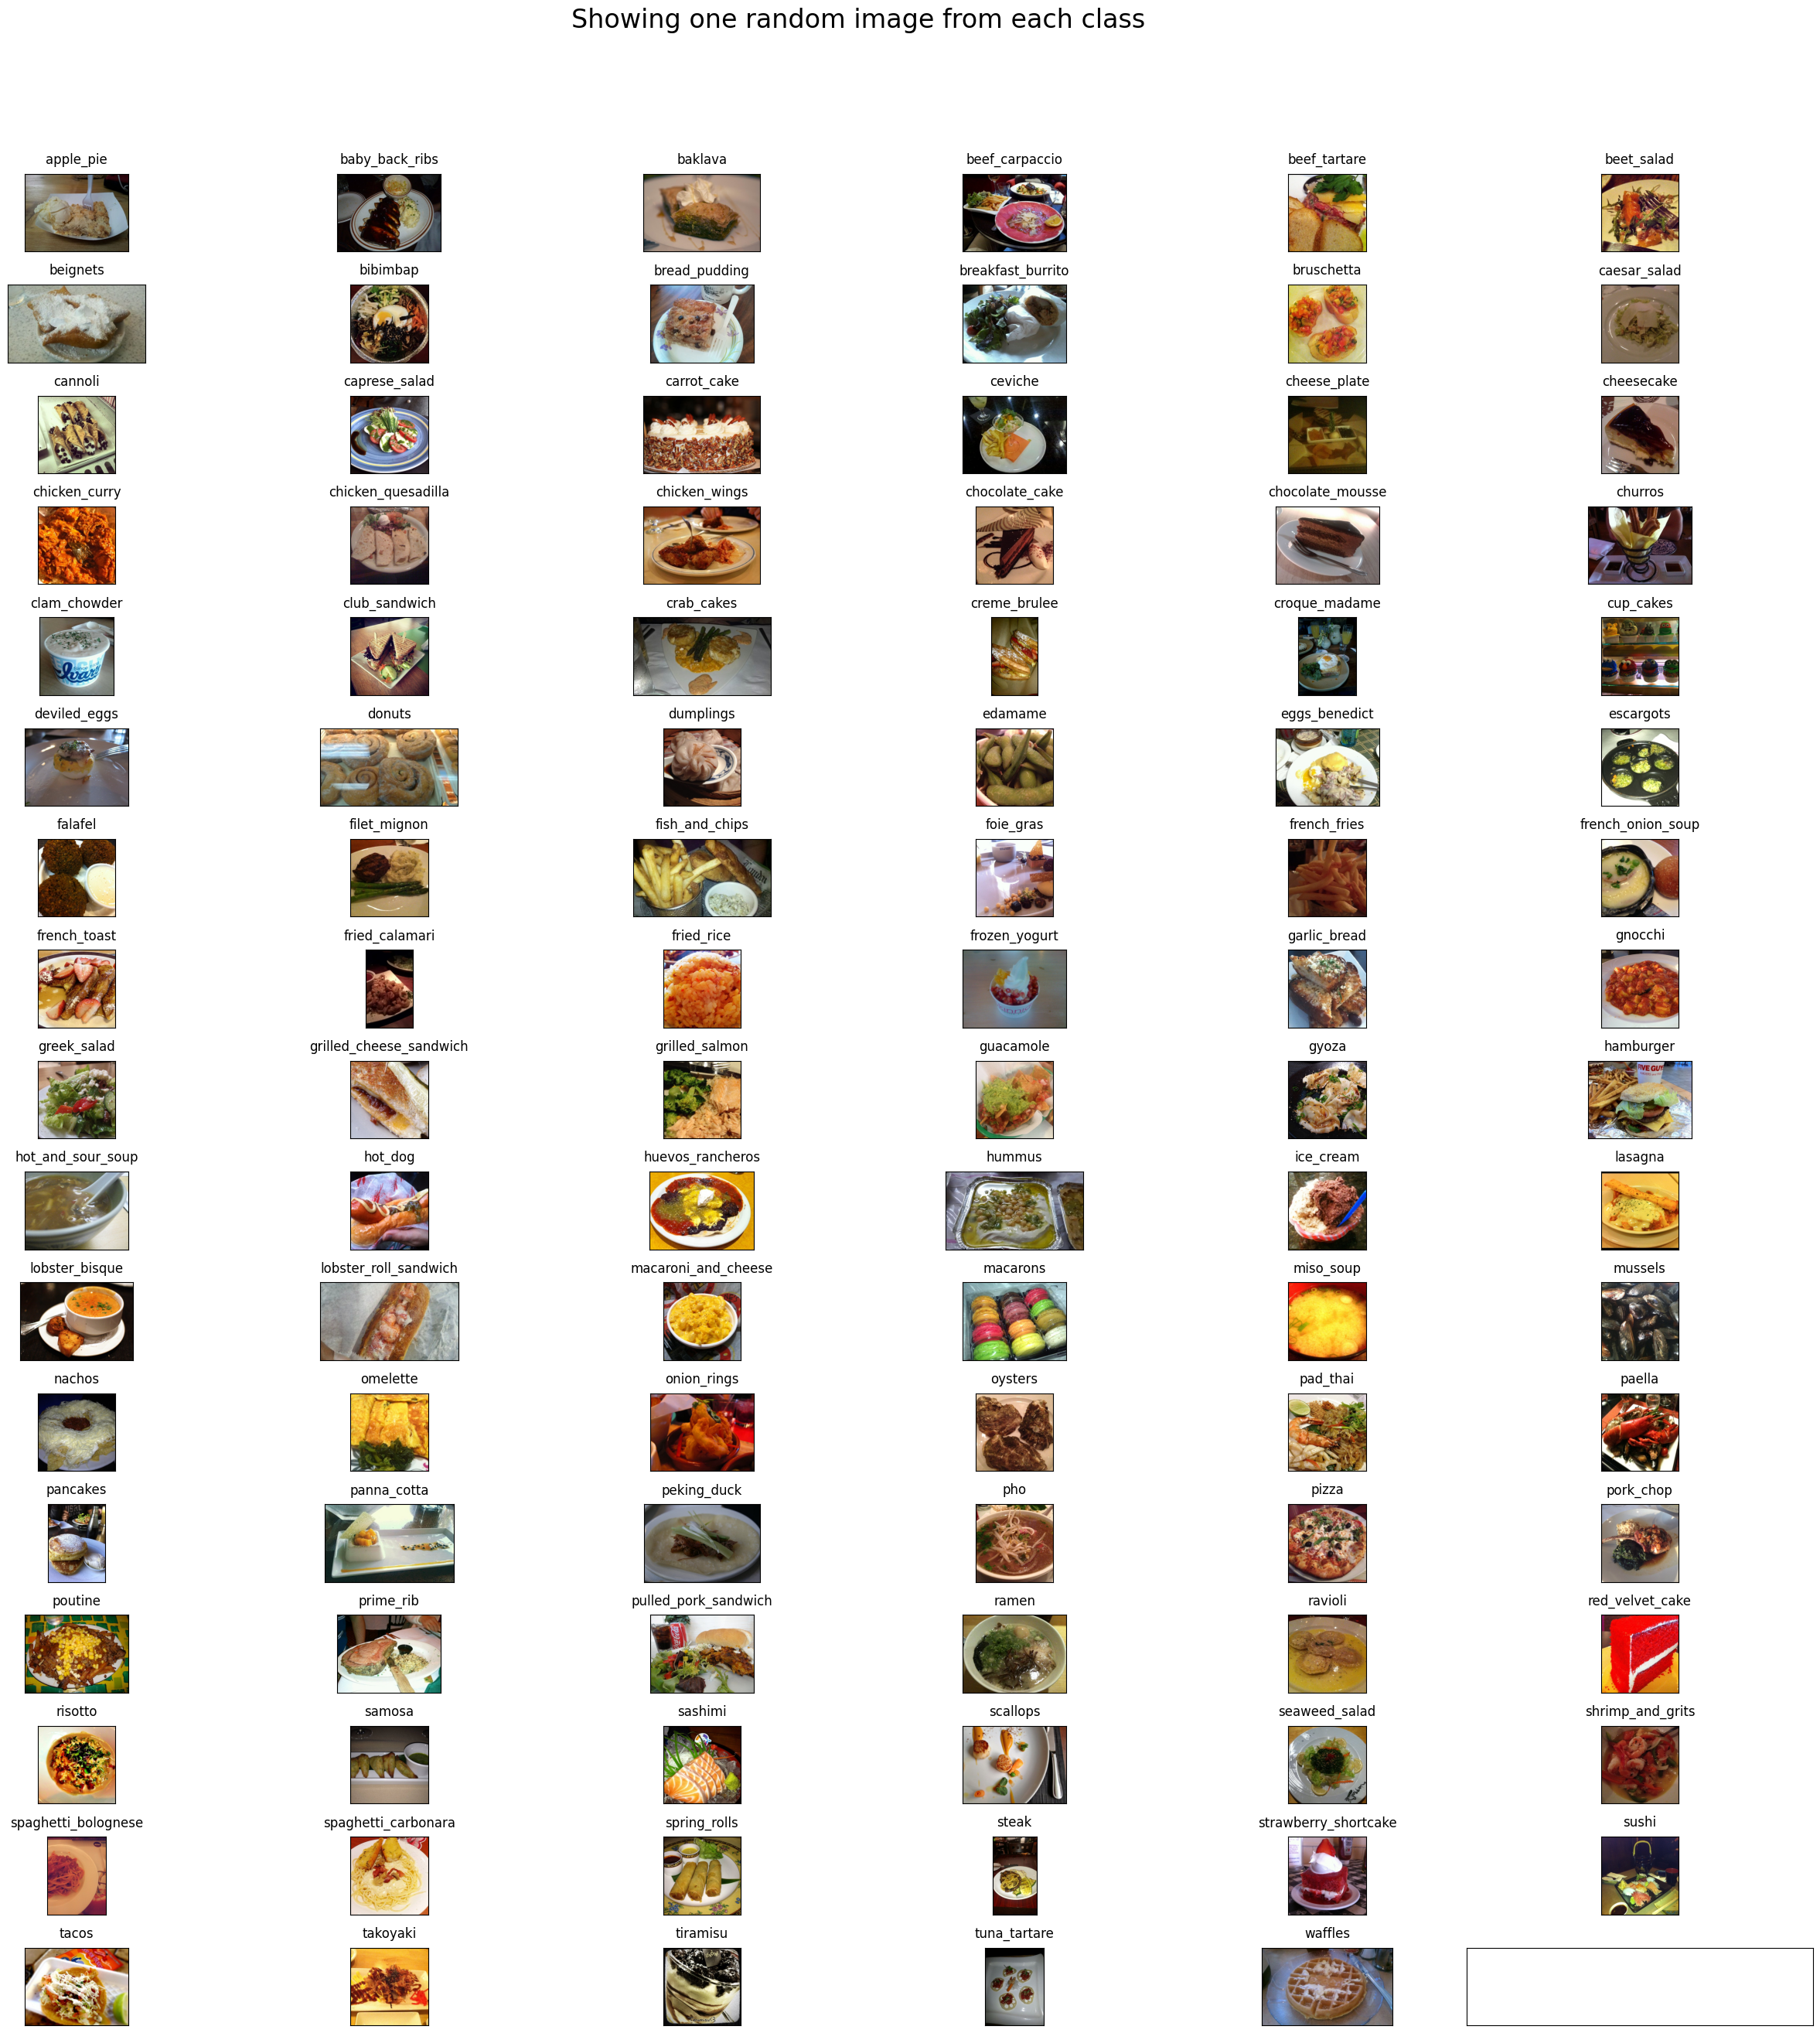

In [10]:
# Visualize the data, showing one image per class from 101 classes
rows = 17
cols = 6
fig, ax = plt.subplots(rows, cols, figsize=(25,25))
fig.suptitle("Showing one random image from each class", y=1.05, fontsize=24) # Adding  y=1.05, fontsize=24 helped me fix the suptitle overlapping with axes issue
data_dir = "food-101/images/"
foods_sorted = sorted(os.listdir(data_dir))
food_id = 0
for i in range(rows):
  for j in range(cols):
    try:
      food_selected = foods_sorted[food_id]
      food_id += 1
    except:
      break
    food_selected_images = os.listdir(os.path.join(data_dir,food_selected)) # returns the list of all files present in each food category
    food_selected_random = np.random.choice(food_selected_images) # picks one food item from the list as choice, takes a list and returns one random item
    img = plt.imread(os.path.join(data_dir,food_selected, food_selected_random))
    ax[i][j].imshow(img)
    ax[i][j].set_title(food_selected, pad = 10)

plt.setp(ax, xticks=[],yticks=[])
plt.tight_layout()
# https://matplotlib.org/users/tight_layout_guide.html


### Split the image data into train and test using train.txt and test.txt

In [11]:
# Helper method to split dataset into train and test folders
from shutil import copy
def prepare_data(filepath, src,dest):
  classes_images = defaultdict(list)
  with open(filepath, 'r') as txt:
      paths = [read.strip() for read in txt.readlines()]
      for p in paths:
        food = p.split('/')
        classes_images[food[0]].append(food[1] + '.jpg')

  for food in classes_images.keys():
    print("\nCopying images into ",food)
    if not os.path.exists(os.path.join(dest,food)):
      os.makedirs(os.path.join(dest,food))
    for i in classes_images[food]:
      copy(os.path.join(src,food,i), os.path.join(dest,food,i))
  print("Copying Done!")

In [12]:
# Prepare train dataset by copying images from food-101/images to food-101/train using the file train.txt
print("Creating train data...")
prepare_data('food-101/meta/train.txt', 'food-101/images', 'food-101/train')

Creating train data...

Copying images into  apple_pie

Copying images into  baby_back_ribs

Copying images into  baklava

Copying images into  beef_carpaccio

Copying images into  beef_tartare

Copying images into  beet_salad

Copying images into  beignets

Copying images into  bibimbap

Copying images into  bread_pudding

Copying images into  breakfast_burrito

Copying images into  bruschetta

Copying images into  caesar_salad

Copying images into  cannoli

Copying images into  caprese_salad

Copying images into  carrot_cake

Copying images into  ceviche

Copying images into  cheesecake

Copying images into  cheese_plate

Copying images into  chicken_curry

Copying images into  chicken_quesadilla

Copying images into  chicken_wings

Copying images into  chocolate_cake

Copying images into  chocolate_mousse

Copying images into  churros

Copying images into  clam_chowder

Copying images into  club_sandwich

Copying images into  crab_cakes

Copying images into  creme_brulee

Copying im

In [13]:
# Prepare test data by copying images from food-101/images to food-101/test using the file test.txt
print("Creating test data...")
prepare_data('food-101/meta/test.txt', 'food-101/images', 'food-101/test')

Creating test data...

Copying images into  apple_pie

Copying images into  baby_back_ribs

Copying images into  baklava

Copying images into  beef_carpaccio

Copying images into  beef_tartare

Copying images into  beet_salad

Copying images into  beignets

Copying images into  bibimbap

Copying images into  bread_pudding

Copying images into  breakfast_burrito

Copying images into  bruschetta

Copying images into  caesar_salad

Copying images into  cannoli

Copying images into  caprese_salad

Copying images into  carrot_cake

Copying images into  ceviche

Copying images into  cheesecake

Copying images into  cheese_plate

Copying images into  chicken_curry

Copying images into  chicken_quesadilla

Copying images into  chicken_wings

Copying images into  chocolate_cake

Copying images into  chocolate_mousse

Copying images into  churros

Copying images into  clam_chowder

Copying images into  club_sandwich

Copying images into  crab_cakes

Copying images into  creme_brulee

Copying ima

In [14]:
# Check how many files are in the train folder
print("Total number of samples in train folder")
!find food-101/train -type d -or -type f -printf '.' | wc -c

Total number of samples in train folder
75750


In [15]:
# Check how many files are in the test folder
print("Total number of samples in test folder")
!find food-101/test -type d -or -type f -printf '.' | wc -c

Total number of samples in test folder
25250


* We now have train and test data ready  
* But to experiment and try different architectures, working on the whole data with 101 classes takes a lot of time and computation  
* To proceed with further experiments, I am creating train_min and test_mini, limiting the dataset to 3 classes  
* Since the original problem is multiclass classification which makes key aspects of architectural decisions different from that of binary classification, choosing 3 classes is a good start instead of 2

In [16]:
# List of all 101 types of foods(sorted alphabetically)
foods_sorted

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheese_plate',
 'cheesecake',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster

In [17]:
# Helper method to create train_mini and test_mini data samples
from shutil import copytree, rmtree
def dataset_mini(food_list, src, dest):
  if os.path.exists(dest):
    rmtree(dest) # removing dataset_mini(if it already exists) folders so that we will have only the classes that we want
  os.makedirs(dest)
  for food_item in food_list :
    print("Copying images into",food_item)
    copytree(os.path.join(src,food_item), os.path.join(dest,food_item))


In [18]:
# picking 3 food items and generating separate data folders for the same
food_list = ['samosa','pizza','omelette']
src_train = 'food-101/train'
dest_train = 'food-101/train_mini'
src_test = 'food-101/test'
dest_test = 'food-101/test_mini'

In [19]:
print("Creating train data folder with new classes")
dataset_mini(food_list, src_train, dest_train)

Creating train data folder with new classes
Copying images into samosa
Copying images into pizza
Copying images into omelette


In [20]:
print("Total number of samples in train folder")

!find food-101/train_mini -type d -or -type f -printf '.' | wc -c

Total number of samples in train folder
2250


In [21]:
print("Creating test data folder with new classes")
dataset_mini(food_list, src_test, dest_test)

Creating test data folder with new classes
Copying images into samosa
Copying images into pizza
Copying images into omelette


In [22]:
print("Total number of samples in test folder")
!find food-101/test_mini -type d -or -type f -printf '.' | wc -c

Total number of samples in test folder
750


**Pretrained model using Food 101 dataset**

* Keras and other Deep Learning libraries provide pretrained models  
* These are deep neural networks with efficient architectures(like VGG,Inception,ResNet) that are already trained on datasets like ImageNet  
* Using these pretrained models, we can use the already learned weights and add few layers on top to finetune the model to our new data  
* This helps in faster convergance and saves time and computation when compared to models trained from scratch

Found 2250 images belonging to 3 classes.
Found 750 images belonging to 3 classes.
19993432/19993432 [==============================] - 0s 0us/step
Epoch 1/10
140/140 [==============================] - 62s 252ms/step - loss: 1.0600 - accuracy: 0.4781 - val_loss: 0.7937 - val_accuracy: 0.6848
Epoch 2/10
140/140 [==============================] - 29s 205ms/step - loss: 0.8313 - accuracy: 0.6634 - val_loss: 0.6140 - val_accuracy: 0.8207
Epoch 3/10
140/140 [==============================] - 29s 205ms/step - loss: 0.6631 - accuracy: 0.7623 - val_loss: 0.5043 - val_accuracy: 0.8546
Epoch 4/10
140/140 [==============================] - 29s 204ms/step - loss: 0.5720 - accuracy: 0.8017 - val_loss: 0.4192 - val_accuracy: 0.8709
Epoch 5/10
140/140 [==============================] - 29s 207ms/step - loss: 0.4990 - accuracy: 0.8174 - val_loss: 0.3696 - val_accuracy: 0.8832
Epoch 6/10
140/140 [==============================] - 29s 205ms/step - loss: 0.4649 - accuracy: 0.8330 - val_loss: 0.3334 - val

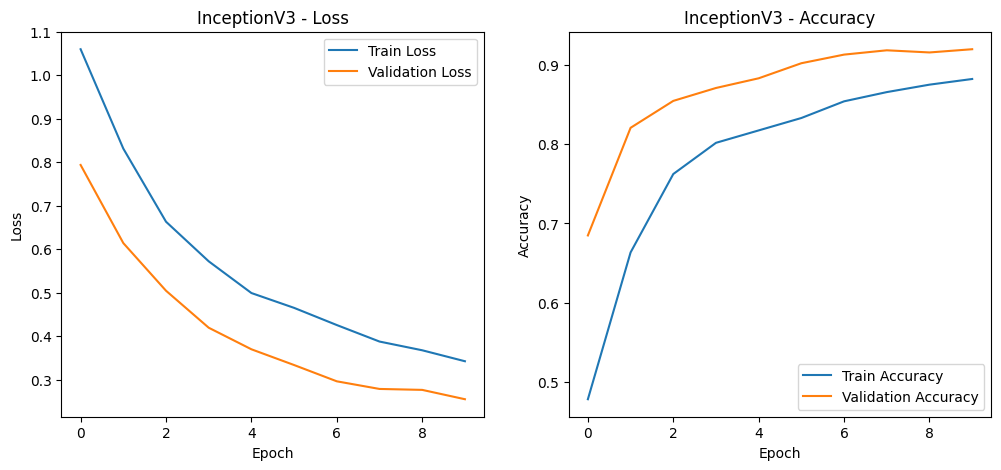

Epoch 1/10
140/140 [==============================] - 47s 223ms/step - loss: 1.1775 - accuracy: 0.4020 - val_loss: 1.2062 - val_accuracy: 0.3302
Epoch 2/10
140/140 [==============================] - 29s 205ms/step - loss: 0.9771 - accuracy: 0.5448 - val_loss: 1.2192 - val_accuracy: 0.3356
Epoch 3/10
140/140 [==============================] - 28s 203ms/step - loss: 0.8562 - accuracy: 0.6276 - val_loss: 1.2100 - val_accuracy: 0.3356
Epoch 4/10
140/140 [==============================] - 29s 203ms/step - loss: 0.7921 - accuracy: 0.6634 - val_loss: 1.2042 - val_accuracy: 0.3342
Epoch 5/10
140/140 [==============================] - 28s 202ms/step - loss: 0.7212 - accuracy: 0.7032 - val_loss: 1.1863 - val_accuracy: 0.3342
Epoch 6/10
140/140 [==============================] - 29s 207ms/step - loss: 0.6809 - accuracy: 0.7363 - val_loss: 1.1566 - val_accuracy: 0.3342
Epoch 7/10
140/140 [==============================] - 29s 204ms/step - loss: 0.6465 - accuracy: 0.7341 - val_loss: 1.1532 - val_ac

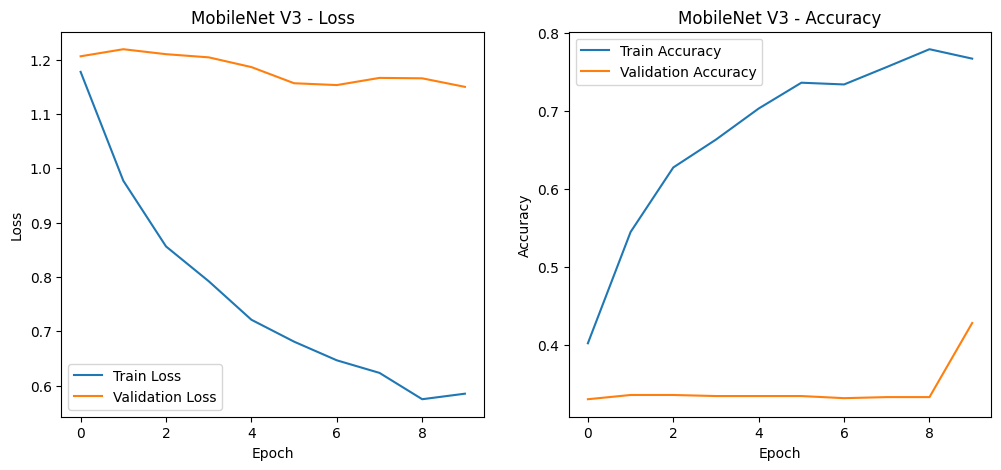

Epoch 1/10
140/140 [==============================] - 116s 250ms/step - loss: 1.1103 - accuracy: 0.4181 - val_loss: 0.9495 - val_accuracy: 0.5761
Epoch 2/10
140/140 [==============================] - 30s 212ms/step - loss: 0.9258 - accuracy: 0.5783 - val_loss: 0.7821 - val_accuracy: 0.6726
Epoch 3/10
140/140 [==============================] - 30s 212ms/step - loss: 0.7918 - accuracy: 0.6714 - val_loss: 0.6961 - val_accuracy: 0.6984
Epoch 4/10
140/140 [==============================] - 30s 211ms/step - loss: 0.7167 - accuracy: 0.7077 - val_loss: 0.6143 - val_accuracy: 0.7351
Epoch 5/10
140/140 [==============================] - 30s 212ms/step - loss: 0.6219 - accuracy: 0.7668 - val_loss: 0.5668 - val_accuracy: 0.7500
Epoch 6/10
140/140 [==============================] - 30s 212ms/step - loss: 0.5664 - accuracy: 0.7914 - val_loss: 0.5125 - val_accuracy: 0.7758
Epoch 7/10
140/140 [==============================] - 30s 211ms/step - loss: 0.5312 - accuracy: 0.8035 - val_loss: 0.4739 - val_a

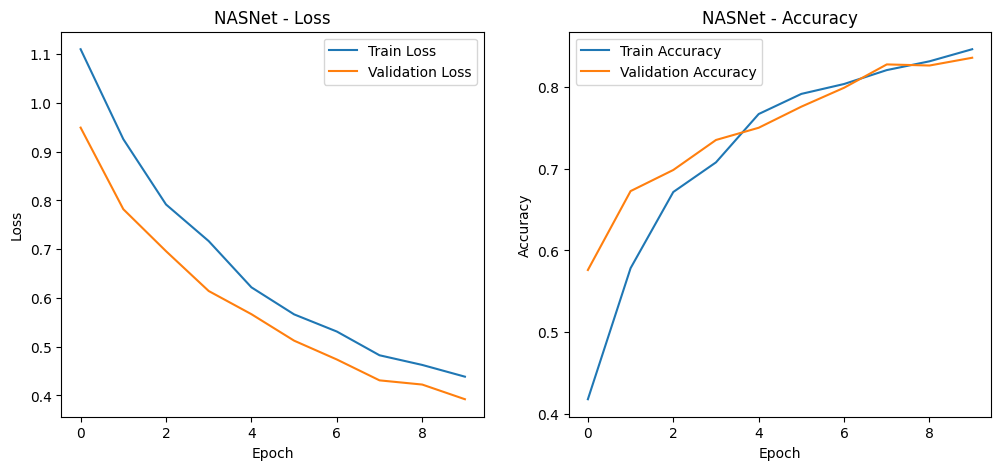

In [23]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.applications import InceptionV3, MobileNetV3Small, NASNetMobile
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt

# Clear any previous session
tf.keras.backend.clear_session()

# Constants
n_classes = 3
img_width, img_height = 224, 224
train_data_dir = 'food-101/train_mini'
validation_data_dir = 'food-101/test_mini'
nb_train_samples = 2250
nb_validation_samples = 750
batch_size = 16
epochs = 10

# Data generators
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1. / 255)
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

def build_and_compile_model(base_model):
    x = GlobalAveragePooling2D()(base_model.output)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.2)(x)
    predictions = Dense(n_classes, activation='softmax', kernel_regularizer=regularizers.l2(0.005))(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    model.compile(optimizer=SGD(learning_rate=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Function to plot training history
def plot_history(history, title):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# Initialize and compile models
inception_base = InceptionV3(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))
inception_model = build_and_compile_model(inception_base)
mobilenet_base = MobileNetV3Small(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))
mobilenet_model = build_and_compile_model(mobilenet_base)
nasnet_base = NASNetMobile(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))
nasnet_model = build_and_compile_model(nasnet_base)

# Train models and plot history
history_inception = inception_model.fit(train_generator, epochs=epochs, validation_data=validation_generator, steps_per_epoch=nb_train_samples // batch_size, validation_steps=nb_validation_samples // batch_size)
plot_history(history_inception, 'InceptionV3')

history_mobilenet = mobilenet_model.fit(train_generator, epochs=epochs, validation_data=validation_generator, steps_per_epoch=nb_train_samples // batch_size, validation_steps=nb_validation_samples // batch_size)
plot_history(history_mobilenet, 'MobileNet V3')

history_nasnet = nasnet_model.fit(train_generator, epochs=epochs, validation_data=validation_generator, steps_per_epoch=nb_train_samples // batch_size, validation_steps=nb_validation_samples // batch_size)
plot_history(history_nasnet, 'NASNet')


**Pretrained model using Food 101 dataset**
In this we will need to replace the model head with the following layers:

1)Global average layer

2)3 fully connected layers (the thirst one will be the final layer used for making predictions)

Found 2250 images belonging to 3 classes.
Found 750 images belonging to 3 classes.
Epoch 1/10
140/140 [==============================] - 48s 212ms/step - loss: 1.2206 - accuracy: 0.3429 - val_loss: 1.0626 - val_accuracy: 0.4769
Epoch 2/10
140/140 [==============================] - 29s 204ms/step - loss: 1.1673 - accuracy: 0.3603 - val_loss: 1.0279 - val_accuracy: 0.5774
Epoch 3/10
140/140 [==============================] - 29s 205ms/step - loss: 1.1097 - accuracy: 0.3975 - val_loss: 1.0029 - val_accuracy: 0.6617
Epoch 4/10
140/140 [==============================] - 29s 204ms/step - loss: 1.0701 - accuracy: 0.4176 - val_loss: 0.9667 - val_accuracy: 0.7269
Epoch 5/10
140/140 [==============================] - 29s 206ms/step - loss: 1.0340 - accuracy: 0.4758 - val_loss: 0.9185 - val_accuracy: 0.7568
Epoch 6/10
140/140 [==============================] - 29s 204ms/step - loss: 0.9936 - accuracy: 0.5067 - val_loss: 0.8579 - val_accuracy: 0.7989
Epoch 7/10
140/140 [===========================

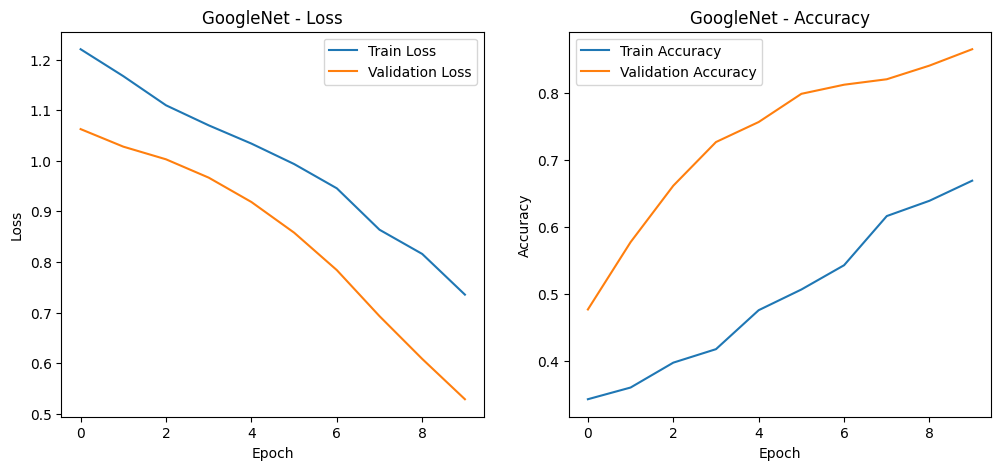

Epoch 1/10
140/140 [==============================] - 42s 209ms/step - loss: 1.3135 - accuracy: 0.3389 - val_loss: 1.0975 - val_accuracy: 0.3329
Epoch 2/10
140/140 [==============================] - 29s 204ms/step - loss: 1.1738 - accuracy: 0.3975 - val_loss: 1.0966 - val_accuracy: 0.3764
Epoch 3/10
140/140 [==============================] - 28s 203ms/step - loss: 1.1166 - accuracy: 0.4315 - val_loss: 1.0996 - val_accuracy: 0.3315
Epoch 4/10
140/140 [==============================] - 29s 204ms/step - loss: 1.0688 - accuracy: 0.4602 - val_loss: 1.0964 - val_accuracy: 0.3383
Epoch 5/10
140/140 [==============================] - 28s 202ms/step - loss: 1.0265 - accuracy: 0.4825 - val_loss: 1.0941 - val_accuracy: 0.3356
Epoch 6/10
140/140 [==============================] - 29s 203ms/step - loss: 0.9763 - accuracy: 0.5237 - val_loss: 1.0974 - val_accuracy: 0.3315
Epoch 7/10
140/140 [==============================] - 28s 203ms/step - loss: 0.9276 - accuracy: 0.5586 - val_loss: 1.0993 - val_ac

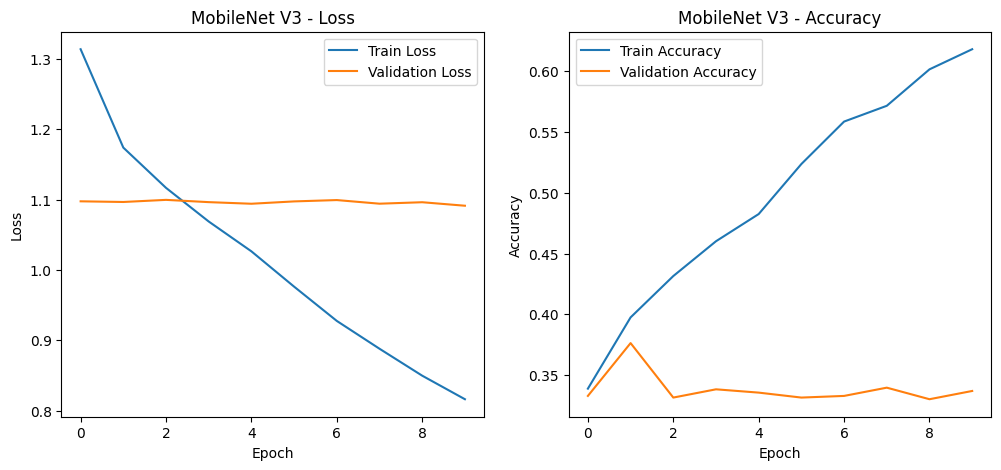

Epoch 1/10
140/140 [==============================] - 112s 237ms/step - loss: 1.2519 - accuracy: 0.3474 - val_loss: 1.0624 - val_accuracy: 0.4851
Epoch 2/10
140/140 [==============================] - 29s 208ms/step - loss: 1.1995 - accuracy: 0.3639 - val_loss: 0.9895 - val_accuracy: 0.6495
Epoch 3/10
140/140 [==============================] - 29s 207ms/step - loss: 1.1278 - accuracy: 0.4038 - val_loss: 0.9355 - val_accuracy: 0.7052
Epoch 4/10
140/140 [==============================] - 30s 213ms/step - loss: 1.0700 - accuracy: 0.4418 - val_loss: 0.8778 - val_accuracy: 0.7323
Epoch 5/10
140/140 [==============================] - 30s 211ms/step - loss: 1.0253 - accuracy: 0.4834 - val_loss: 0.8129 - val_accuracy: 0.7704
Epoch 6/10
140/140 [==============================] - 30s 211ms/step - loss: 0.9734 - accuracy: 0.5242 - val_loss: 0.7427 - val_accuracy: 0.7527
Epoch 7/10
140/140 [==============================] - 29s 209ms/step - loss: 0.9140 - accuracy: 0.5640 - val_loss: 0.6717 - val_a

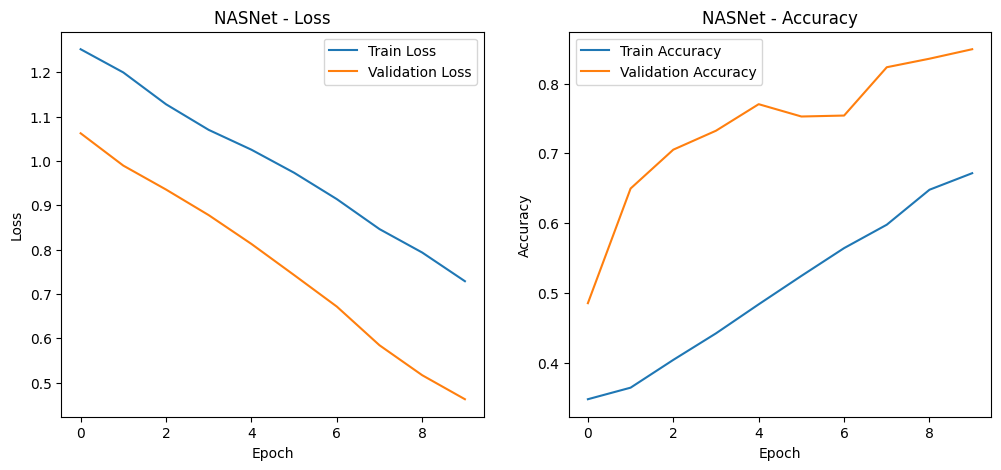

In [24]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.applications import InceptionV3, MobileNetV3Small, NASNetMobile
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt

# Clear any previous session
tf.keras.backend.clear_session()

# Constants
n_classes = 3
img_width, img_height = 224, 224  # Adjusted to a common size for all models
train_data_dir = 'food-101/train_mini'
validation_data_dir = 'food-101/test_mini'
nb_train_samples = 2250
nb_validation_samples = 750
batch_size = 16
epochs = 10

# Data generators
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

def build_and_compile_model(base_model):
    x = GlobalAveragePooling2D()(base_model.output)
    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    predictions = Dense(n_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    model.compile(optimizer=SGD(learning_rate=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Initialize and compile models
inception_base = InceptionV3(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))
inception_model = build_and_compile_model(inception_base)
mobilenet_base = MobileNetV3Small(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))
mobilenet_model = build_and_compile_model(mobilenet_base)
nasnet_base = NASNetMobile(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))
nasnet_model = build_and_compile_model(nasnet_base)

# Function to plot training history
def plot_history(history, title):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# Train models and plot history
history_inception = inception_model.fit(train_generator, epochs=epochs, validation_data=validation_generator, steps_per_epoch=nb_train_samples // batch_size, validation_steps=nb_validation_samples // batch_size)
plot_history(history_inception, 'GoogleNet')

history_mobilenet = mobilenet_model.fit(train_generator, epochs=epochs, validation_data=validation_generator, steps_per_epoch=nb_train_samples // batch_size, validation_steps=nb_validation_samples // batch_size)
plot_history(history_mobilenet, 'MobileNet V3')

history_nasnet = nasnet_model.fit(train_generator, epochs=epochs, validation_data=validation_generator, steps_per_epoch=nb_train_samples // batch_size, validation_steps=nb_validation_samples // batch_size)
plot_history(history_nasnet, 'NASNet')


**Evaluate the model on Training & Validation data**

To print out the final training, testing, and validation accuracies for each of the models—GoogleNet, MobileNet V3, and NASNet—you need to evaluate these models on your training and validation datasets after the training is complete. The evaluation will give you the loss and accuracy of each model on these datasets.

In [25]:
def evaluate_model(model, train_generator, validation_generator, model_name):
    # Evaluate on training data
    train_loss, train_accuracy = model.evaluate(train_generator, verbose=1)
    print(f'{model_name} Training Loss: {train_loss:.4f}')
    print(f'{model_name} Training Accuracy: {train_accuracy:.4f}')

    # Evaluate on validation data
    validation_loss, validation_accuracy = model.evaluate(validation_generator, verbose=1)
    print(f'{model_name} Validation Loss: {validation_loss:.4f}')
    print(f'{model_name} Validation Accuracy: {validation_accuracy:.4f}')

# Evaluate each model
print("Evaluating GoogleNet...")
evaluate_model(inception_model, train_generator, validation_generator, 'InceptionV3')

print("\nEvaluating MobileNet V3...")
evaluate_model(mobilenet_model, train_generator, validation_generator, 'MobileNet V3')

print("\nEvaluating NASNet...")
evaluate_model(nasnet_model, train_generator, validation_generator, 'NASNet')


Evaluating GoogleNet...
141/141 [==============================] - 28s 198ms/step - loss: 0.5633 - accuracy: 0.8258
InceptionV3 Training Loss: 0.5633
InceptionV3 Training Accuracy: 0.8258
47/47 [==============================] - 3s 73ms/step - loss: 0.5300 - accuracy: 0.8627
InceptionV3 Validation Loss: 0.5300
InceptionV3 Validation Accuracy: 0.8627

Evaluating MobileNet V3...
141/141 [==============================] - 27s 189ms/step - loss: 1.0945 - accuracy: 0.3378
MobileNet V3 Training Loss: 1.0945
MobileNet V3 Training Accuracy: 0.3378
47/47 [==============================] - 2s 42ms/step - loss: 1.0916 - accuracy: 0.3347
MobileNet V3 Validation Loss: 1.0916
MobileNet V3 Validation Accuracy: 0.3347

Evaluating NASNet...
141/141 [==============================] - 27s 193ms/step - loss: 0.5345 - accuracy: 0.8138
NASNet Training Loss: 0.5345
NASNet Training Accuracy: 0.8138
47/47 [==============================] - 2s 46ms/step - loss: 0.4645 - accuracy: 0.8480
NASNet Validation Loss: 

In [26]:
from sklearn.metrics import classification_report
import numpy as np

def evaluate_model(model, train_generator, validation_generator, model_name):
    # Evaluate on training data
    train_loss, train_accuracy = model.evaluate(train_generator, verbose=1)
    print(f'{model_name} Training Loss: {train_loss:.4f}')
    print(f'{model_name} Training Accuracy: {train_accuracy:.4f}')

    # Evaluate on validation data
    validation_loss, validation_accuracy = model.evaluate(validation_generator, verbose=1)
    print(f'{model_name} Validation Loss: {validation_loss:.4f}')
    print(f'{model_name} Validation Accuracy: {validation_accuracy:.4f}')

    # Predict classes and calculate precision and recall
    predictions = model.predict(validation_generator, steps=validation_generator.n // batch_size, verbose=1)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = validation_generator.classes
    class_labels = list(validation_generator.class_indices.keys())

    # Ensure true_classes and predicted_classes have same length
    true_classes = true_classes[:len(predicted_classes)]

    report = classification_report(true_classes, predicted_classes, target_names=class_labels)
    print(report)

# Evaluate each model
print("Evaluating GoogleNet...")
evaluate_model(inception_model, train_generator, validation_generator, 'InceptionV3')

print("\nEvaluating MobileNet V3...")
evaluate_model(mobilenet_model, train_generator, validation_generator, 'MobileNet V3')

print("\nEvaluating NASNet...")
evaluate_model(nasnet_model, train_generator, validation_generator, 'NASNet')


Evaluating GoogleNet...
141/141 [==============================] - 27s 189ms/step - loss: 0.5626 - accuracy: 0.8244
InceptionV3 Training Loss: 0.5626
InceptionV3 Training Accuracy: 0.8244
47/47 [==============================] - 2s 42ms/step - loss: 0.5300 - accuracy: 0.8627
InceptionV3 Validation Loss: 0.5300
InceptionV3 Validation Accuracy: 0.8627
46/46 [==============================] - 3s 41ms/step
              precision    recall  f1-score   support

    omelette       0.33      0.28      0.30       250
       pizza       0.33      0.38      0.35       250
      samosa       0.32      0.33      0.33       236

    accuracy                           0.33       736
   macro avg       0.33      0.33      0.33       736
weighted avg       0.33      0.33      0.33       736


Evaluating MobileNet V3...
141/141 [==============================] - 27s 189ms/step - loss: 1.0944 - accuracy: 0.3364
MobileNet V3 Training Loss: 1.0944
MobileNet V3 Training Accuracy: 0.3364
47/47 [============

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


141/141 [==============================] - 28s 195ms/step - loss: 0.5334 - accuracy: 0.8089
NASNet Training Loss: 0.5334
NASNet Training Accuracy: 0.8089
47/47 [==============================] - 2s 46ms/step - loss: 0.4645 - accuracy: 0.8480
NASNet Validation Loss: 0.4645
NASNet Validation Accuracy: 0.8480
46/46 [==============================] - 6s 45ms/step
              precision    recall  f1-score   support

    omelette       0.31      0.39      0.34       250
       pizza       0.31      0.31      0.31       250
      samosa       0.34      0.25      0.29       236

    accuracy                           0.32       736
   macro avg       0.32      0.32      0.31       736
weighted avg       0.32      0.32      0.31       736



**Part B:**

1) Select the  Pre-trained Model: Based on the training results from Part A, choose the model that performed best.

2)Fine-Tune the Model on Food101 Dataset: Fine-tuning involves unfreezing some of the layers of the pre-trained model to allow for more specific learning on your new dataset, which in this case is the Food101 dataset.

3)Experiment with Unfreezing Different Layers: As requested, you should unfreeze at least two different layers of the model to see which provides better performance improvements.


Based on the output you've provided, it looks like GoogleNet has the highest training and validation accuracies, making it the best candidate for further fine-tuning on the Food101 dataset.

Here are the steps to fine-tune the GoogleNet model:

Unfreeze the top layers: You'll start by unfreezing some of the last layers of the InceptionV3 model to allow for fine-tuning. The number of layers to unfreeze can vary, but it's common to start with a few and adjust based on the performance.
Fine-tune the model: After unfreezing the layers, continue training the model on the Food101 dataset.
Let's proceed with the fine-tuning of InceptionV3:

0 input_1
1 conv2d
2 batch_normalization
3 activation
4 conv2d_1
5 batch_normalization_1
6 activation_1
7 conv2d_2
8 batch_normalization_2
9 activation_2
10 max_pooling2d
11 conv2d_3
12 batch_normalization_3
13 activation_3
14 conv2d_4
15 batch_normalization_4
16 activation_4
17 max_pooling2d_1
18 conv2d_8
19 batch_normalization_8
20 activation_8
21 conv2d_6
22 conv2d_9
23 batch_normalization_6
24 batch_normalization_9
25 activation_6
26 activation_9
27 average_pooling2d
28 conv2d_5
29 conv2d_7
30 conv2d_10
31 conv2d_11
32 batch_normalization_5
33 batch_normalization_7
34 batch_normalization_10
35 batch_normalization_11
36 activation_5
37 activation_7
38 activation_10
39 activation_11
40 mixed0
41 conv2d_15
42 batch_normalization_15
43 activation_15
44 conv2d_13
45 conv2d_16
46 batch_normalization_13
47 batch_normalization_16
48 activation_13
49 activation_16
50 average_pooling2d_1
51 conv2d_12
52 conv2d_14
53 conv2d_17
54 conv2d_18
55 batch_normalization_12
56 batch_normalization_14
5

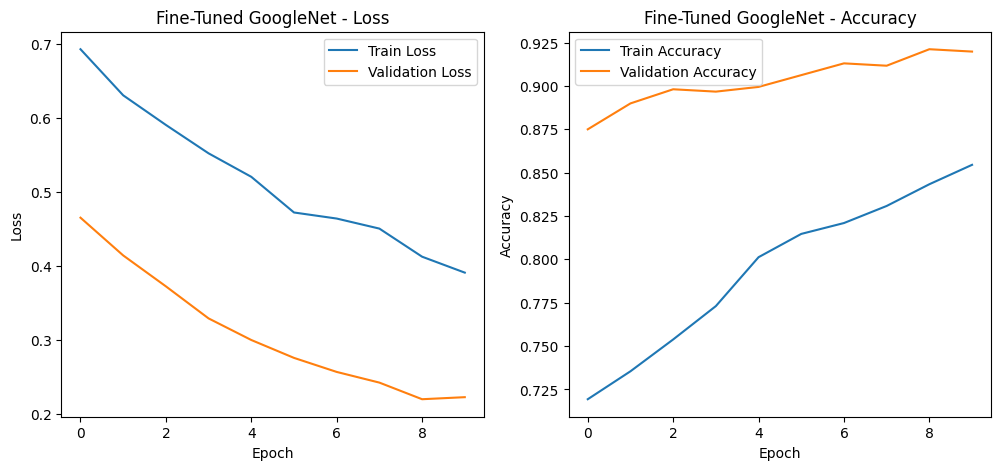

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [27]:
# Unfreeze the last two blocks of the InceptionV3 base model for fine-tuning
# InceptionV3 architecture uses mixed layers, you typically need to unfreeze a few of those mixed layers

# First, let's see the structure of the layers to determine which ones to unfreeze
for i, layer in enumerate(inception_base.layers):
    print(i, layer.name)

# Based on the output above, determine which layer numbers correspond to the top 2 blocks
# Here's a hypothetical example of how to unfreeze them:
unfreeze_from_layer = 249  # Replace with the actual layer from where you want to unfreeze

# Unfreeze the top layers
for layer in inception_base.layers[unfreeze_from_layer:]:
    layer.trainable = True

# Re-compile the model for these changes to take effect
inception_model.compile(optimizer=SGD(learning_rate=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

# Continue fine-tuning the model
history_fine_tune_inception = inception_model.fit(
    train_generator,
    epochs=epochs,  # You may want to use a smaller number of epochs for fine-tuning
    validation_data=validation_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    validation_steps=nb_validation_samples // batch_size
)

# Plot the fine-tuning history
plot_history(history_fine_tune_inception, 'Fine-Tuned GoogleNet')

# Save the fine-tuned model
inception_model.save('/mnt/data/fine_tuned_inceptionv3.h5')


In [28]:
# Function to evaluate the model on the training and validation sets
def evaluate_model(model, train_generator, validation_generator, model_name):
    # Evaluate on training data
    train_loss, train_accuracy = model.evaluate(train_generator, verbose=1)
    print(f'{model_name} Training Loss: {train_loss:.4f}')
    print(f'{model_name} Training Accuracy: {train_accuracy:.4f}')

    # Evaluate on validation data
    validation_loss, validation_accuracy = model.evaluate(validation_generator, verbose=1)
    print(f'{model_name} Validation Loss: {validation_loss:.4f}')
    print(f'{model_name} Validation Accuracy: {validation_accuracy:.4f}')

    # Get the predictions and true classes for the validation set
    validation_predictions = model.predict(validation_generator, steps=np.ceil(validation_generator.samples / validation_generator.batch_size))
    validation_predicted_classes = np.argmax(validation_predictions, axis=1)
    true_classes = validation_generator.classes
    true_classes = true_classes[:len(validation_predicted_classes)]  # Match lengths of predictions and true classes

    # Calculate classification report which includes precision, recall, and F1-score
    report = classification_report(true_classes, validation_predicted_classes, target_names=validation_generator.class_indices, zero_division=0)
    print(report)

# Unfreeze the last two blocks of the InceptionV3 base model for fine-tuning
# ...

# Continue fine-tuning the model
# ...

# Plot the fine-tuning history
# ...

# Save the fine-tuned model
# ...

# Evaluate the fine-tuned model
print("Evaluating the fine-tuned GoogleNet...")
evaluate_model(inception_model, train_generator, validation_generator, 'Fine-Tuned GoogleNet')


Evaluating the fine-tuned GoogleNet...
141/141 [==============================] - 27s 191ms/step - loss: 0.2075 - accuracy: 0.9293
Fine-Tuned GoogleNet Training Loss: 0.2075
Fine-Tuned GoogleNet Training Accuracy: 0.9293
47/47 [==============================] - 2s 42ms/step - loss: 0.2210 - accuracy: 0.9213
Fine-Tuned GoogleNet Validation Loss: 0.2210
Fine-Tuned GoogleNet Validation Accuracy: 0.9213
47/47 [==============================] - 3s 40ms/step
              precision    recall  f1-score   support

    omelette       0.32      0.33      0.33       250
       pizza       0.36      0.38      0.37       250
      samosa       0.39      0.36      0.37       250

    accuracy                           0.36       750
   macro avg       0.36      0.36      0.36       750
weighted avg       0.36      0.36      0.36       750

